In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])


In [ ]:
# 1. Analytic Solution (Closed-Form Solution)
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)


In [ ]:
# Calculate beta1 and beta0
beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
beta0 = y_mean - beta1 * x_mean


In [ ]:
# Predicted y values using the regression line
y_pred = beta0 + beta1 * x

In [ ]:
# Calculate SSE and R-squared
SSE = np.sum((y - y_pred)**2)
SST = np.sum((y - y_mean)**2)  # Total sum of squares
R_squared = 1 - (SSE / SST)

print(f"Analytic Solution:")
print(f"Intercept (beta0): {beta0}")
print(f"Slope (beta1): {beta1}")
print(f"SSE: {SSE}")
print(f"R²: {R_squared}")


Analytic Solution:
Intercept (beta0): 1.2363636363636363
Slope (beta1): 1.1696969696969697
SSE: 5.624242424242423
R²: 0.952538038613988


In [ ]:
# Full-Batch Gradient Descent Implementation
# Initialize parameters
beta0_gd = 0
beta1_gd = 0
alpha = 0.01
epochs = 1000

In [ ]:
# Full-Batch Gradient Descent
for i in range(epochs):
    y_pred_gd = beta0_gd + beta1_gd * x
    d_beta0 = (-2/n) * np.sum(y - y_pred_gd)
    d_beta1 = (-2/n) * np.sum((y - y_pred_gd) * x)
    beta0_gd -= alpha * d_beta0
    beta1_gd -= alpha * d_beta1

y_pred_gd = beta0_gd + beta1_gd * x
SSE_gd = np.sum((y - y_pred_gd)**2)
R_squared_gd = 1 - (SSE_gd / SST)
print(f"\nGradient Descent Solution (Full-Batch):")
print(f"Intercept (beta0): {beta0_gd}")
print(f"Slope (beta1): {beta1_gd}")
print(f"SSE: {SSE_gd}")
print(f"R²: {R_squared_gd}")



Gradient Descent Solution (Full-Batch):
Intercept (beta0): 1.2328099487610318
Slope (beta1): 1.170263693076768
SSE: 5.624278989977716
R²: 0.9525377300423822


In [ ]:
# Stochastic Gradient Descent Implementation
beta0_sgd = 0
beta1_sgd = 0
alpha_sgd = 0.01
epochs_sgd = 1000

In [ ]:
# Stochastic Gradient Descent
for i in range(epochs_sgd):
    for j in range(n):
        rand_index = np.random.randint(0, n)  # randomly pick a data point
        x_i = x[rand_index]
        y_i = y[rand_index]
        y_pred_sgd = beta0_sgd + beta1_sgd * x_i
        d_beta0_sgd = -2 * (y_i - y_pred_sgd)
        d_beta1_sgd = -2 * (y_i - y_pred_sgd) * x_i
        beta0_sgd -= alpha_sgd * d_beta0_sgd
        beta1_sgd -= alpha_sgd * d_beta1_sgd

y_pred_sgd = beta0_sgd + beta1_sgd * x
SSE_sgd = np.sum((y - y_pred_sgd)**2)
R_squared_sgd = 1 - (SSE_sgd / SST)
print(f"\nStochastic Gradient Descent Solution:")
print(f"Intercept (beta0): {beta0_sgd}")
print(f"Slope (beta1): {beta1_sgd}")
print(f"SSE: {SSE_sgd}")
print(f"R²: {R_squared_sgd}")



Stochastic Gradient Descent Solution:
Intercept (beta0): 1.2624139660051052
Slope (beta1): 1.1227618087017612
SSE: 6.148816904802812
R²: 0.9481112497484995


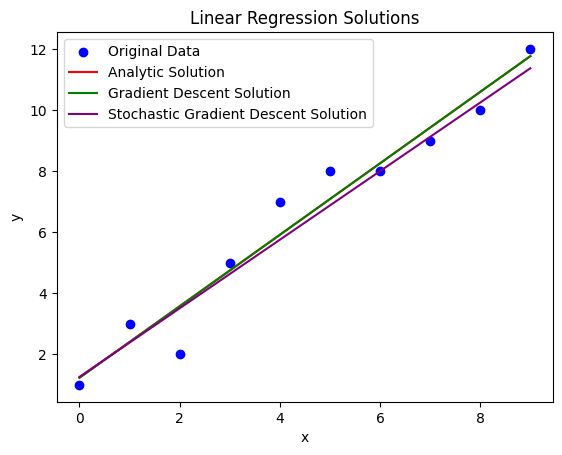

In [ ]:
# Plotting
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Analytic Solution')
plt.plot(x, y_pred_gd, color='green', label='Gradient Descent Solution')
plt.plot(x, y_pred_sgd, color='purple', label='Stochastic Gradient Descent Solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Solutions')
plt.show()